# Проект з нечiткої логiки для оцiнки атестацiї студента
## Машир Анна, Романов Микола, Шевченко Ніколай, Старенченко Назар


# Крок 0: Встановимо бібліотеку scikit-fuzzy.
Scikit-Fuzzy - це набір алгоритмів нечіткої логіки, призначених для використання в SciPy Stack, написаних на мові програмування Python.

In [ ]:
pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=c9a6719d01ccb677cacf930d5cdb465439ba7aa2d78dcf60dfdb0530ce177be3
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Крок 1: Визначення лінгвістичних змінних і функцій належності

## Визначемо лінгвістичні змінні:
- **Вхідні змінні**:
  - **Відвідуваність** (Attendance): Низька, Середня, Висока
  - **Активність на заняттях** (Participation): Низька, Середня, Висока
  - **Домашні завдання** (Homework): Погано, Добре, Відмінно
- **Вихідна змінна**:
  - **Оцінка** (Grade): Незадовільно, Задовільно, Добре, Відмінно

## Визначимо функції належності

#### Відвідуваність (Attendance)
1. Низька (Low):
$$
\mu_{\text{Low}}(x)  = \begin{cases}
1, & x \le 40 \\
\frac{60 - x}{20}, & 40 < x \le 60 \\
0, & x > 60
\end{cases}
$$
2. Середня (Medium): $$\mu_{\text{Medium}}(x) = \begin{cases}
0, & x \le 40 \\
\frac{x - 40}{20}, & 40 < x \le 60 \\
\frac{80 - x}{20}, & 60 < x \le 80 \\
0, & x > 80
\end{cases}$$

3. Висока (High): $$\mu_{\text{High}}(x) = \begin{cases}
0, & x \le 60 \\
\frac{x - 60}{20}, & 60 < x \le 80 \\
1, & x > 80
\end{cases}$$

#### Активність на заняттях (Participation)
1. Низька (Low): $$\mu_{\text{Low}}(x) = \begin{cases}
1, & x \le 40 \\
\frac{60 - x}{20}, & 40 < x \le 60 \\
0, & x > 60
\end{cases}$$

2. Середня (Medium): $$\mu_{\text{Medium}}(x) = \begin{cases}
0, & x \le 40 \\
\frac{x - 40}{20}, & 40 < x \le 60 \\
\frac{80 - x}{20}, & 60 < x \le 80 \\
0, & x > 80
\end{cases}$$

3. Висока (High): $$\mu_{\text{High}}(x) = \begin{cases}
0, & x \le 60 \\
\frac{x - 60}{20}, & 60 < x \le 80 \\
1, & x > 80
\end{cases}$$

#### Домашні завдання (Homework)
1. Погано (Poor): $$\mu_{\text{Poor}}(x) = \begin{cases}
1, & x \le 50 \\
\frac{70 - x}{20}, & 50 < x \le 70 \\
0, & x > 70
\end{cases}$$

2. Добре (Good): $$\mu_{\text{Good}}(x) = \begin{cases}
0, & x \le 50 \\
\frac{x - 50}{20}, & 50 < x \le 70 \\
\frac{90 - x}{20}, & 70 < x \le 90 \\
0, & x > 90
\end{cases}$$

3. Відмінно (Excellent): $$\mu_{\text{Excellent}}(x) = \begin{cases}
0, & x \le 70 \\
\frac{x - 70}{20}, & 70 < x \le 90 \\
1, & x > 90
\end{cases}$$

#### Оцінка (Grade)
1. Незадовільно (Fail): $$\mu_{\text{Fail}}(x) = \begin{cases}
1, & x \le 50 \\
\frac{65 - x}{15}, & 50 < x \le 65 \\
0, & x > 65
\end{cases}$$

2. Задовільно (Pass): $$\mu_{\text{Pass}}(x) = \begin{cases}
0, & x \le 50 \\
\frac{x - 50}{15}, & 50 < x \le 65 \\
\frac{80 - x}{15}, & 65 < x \le 80 \\
0, & x > 80
\end{cases}$$

3. Добре (Good): $$\mu_{\text{Good}}(x) = \begin{cases}
0, & x \le 65 \\
\frac{x - 65}{15}, & 65 < x \le 80 \\
\frac{95 - x}{15}, & 80 < x \le 95 \\
0, & x > 95
\end{cases}$$

4. Відмінно (Excellent): $$\mu_{\text{Excellent}}(x) = \begin{cases}
0, & x \le 80 \\
\frac{x - 80}{15}, & 80 < x \le 95 \\
1, & x > 95
\end{cases}$$

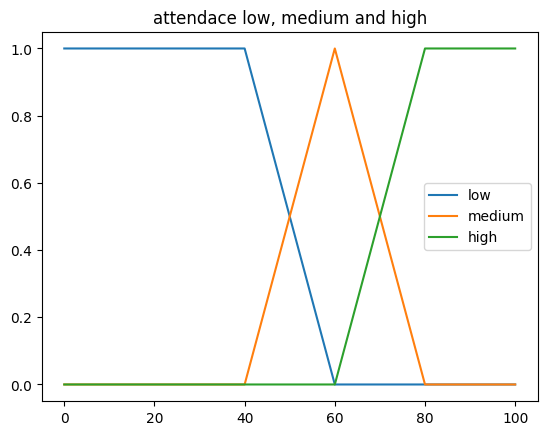

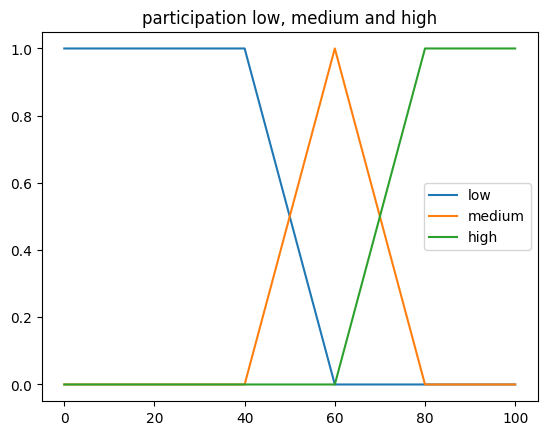

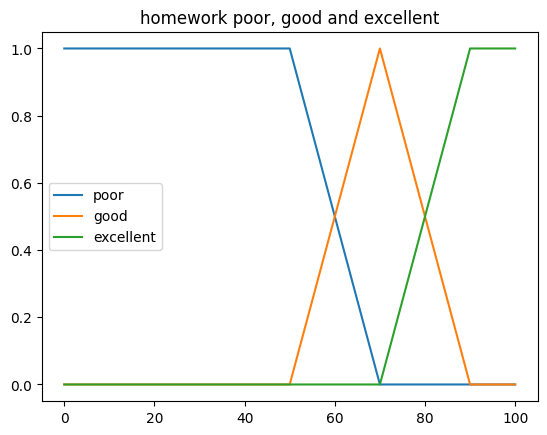

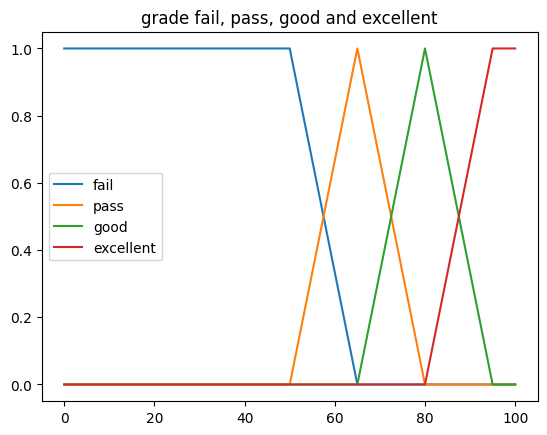

In [ ]:
# Створення універсумів для кожної змінної
x_attendance = np.arange(0, 101, 1)
x_participation = np.arange(0, 101, 1)
x_homework = np.arange(0, 101, 1)
x_grade = np.arange(0, 101, 1)

# Функції належності для Відвідуваності
attendance_low = fuzz.trapmf(x_attendance,[0, 0, 40, 60])
attendance_medium = fuzz.trimf(x_attendance, [40, 60, 80])
attendance_high = fuzz.trapmf(x_attendance,[60, 80, 100, 100])

# Функції належності для Активності на заняттях
participation_low = fuzz.trapmf(x_attendance,[0, 0, 40, 60])
participation_medium = fuzz.trimf(x_participation, [40, 60, 80])
participation_high = fuzz.trapmf(x_attendance,[60, 80, 100, 100])

# Функції належності для Домашніх робіт
homework_poor = fuzz.trapmf(x_attendance,[0, 0, 50, 70])
homework_good = fuzz.trimf(x_homework, [50, 70, 90])
homework_excellent = fuzz.trapmf(x_attendance,[70, 90, 100, 100])


# Функції належності для Оцінки
grade_fail = fuzz.trapmf(x_attendance,[0, 0, 50, 65])
grade_pass = fuzz.trimf(x_grade, [50, 65, 80])
grade_good = fuzz.trimf(x_grade, [65, 80, 95])
grade_excellent = fuzz.trapmf(x_attendance,[80, 95, 100, 100])



plt.plot(x_attendance, attendance_low, label="low")
plt.plot(x_attendance, attendance_medium, label="medium")
plt.plot(x_attendance, attendance_high, label="high")
plt.title('attendace low, medium and high')
plt.legend()
plt.show()


plt.plot(x_participation, participation_low, label="low")
plt.plot(x_participation, participation_medium, label="medium")
plt.plot(x_participation, participation_high, label="high")
plt.title('participation low, medium and high')
plt.legend()
plt.show()

plt.plot(x_homework, homework_poor, label="poor")
plt.plot(x_homework, homework_good, label="good")
plt.plot(x_homework, homework_excellent, label="excellent")
plt.title('homework poor, good and excellent')
plt.legend()
plt.show()


plt.plot(x_grade, grade_fail, label="fail")
plt.plot(x_grade, grade_pass, label="pass")
plt.plot(x_grade, grade_good, label="good")
plt.plot(x_grade, grade_excellent, label="excellent")
plt.title('grade fail, pass, good and excellent')
plt.legend()
plt.show()

Задамо вхідні дані для подальших обчислень:

In [ ]:
# Вхідні дані
attendance_score = 75
participation_score = 65
homework_score = 85

In [ ]:
# Задамо ступінь належності
attendance_low_degree = fuzz.interp_membership(x_attendance, attendance_low, attendance_score)
attendance_medium_degree = fuzz.interp_membership(x_attendance, attendance_medium, attendance_score)
attendance_high_degree = fuzz.interp_membership(x_attendance, attendance_high, attendance_score)

participation_low_degree = fuzz.interp_membership(x_participation, participation_low, participation_score)
participation_medium_degree = fuzz.interp_membership(x_participation, participation_medium, participation_score)
participation_high_degree = fuzz.interp_membership(x_participation, participation_high, participation_score)

homework_poor_degree = fuzz.interp_membership(x_homework, homework_poor, homework_score)
homework_good_degree = fuzz.interp_membership(x_homework, homework_good, homework_score)
homework_excellent_degree = fuzz.interp_membership(x_homework, homework_excellent, homework_score)


print(attendance_low_degree)
print(attendance_medium_degree)
print(attendance_high_degree)

0.0
0.25
0.75


# Крок 2: Визначення правил та нечітка імплікація

Задамо правила нечіткого виводу:

1. Якщо Відвідуваність Висока і Активність на заняттях Висока і Домашні завдання Відмінно, тоді Оцінка Відмінно.
2. Якщо Відвідуваність Середня і Активність на заняттях Середня і Домашні завдання Добре, тоді Оцінка Добре.
3. Якщо Відвідуваність Низька і Активність на заняттях Низька і Домашні завдання Погано, тоді Оцінка Незадовільно.
4. Якщо Відвідуваність Середня і Активність на заняттях Низька і Домашні завдання Добре, тоді Оцінка Задовільно.

Для обчислення нечіткої імплікації оберемо метод Мамдані. За цим методом, ми використовуємо мінімальну функцію для обчислення нечіткого правила.

In [ ]:
rule_1 = np.fmax(np.fmax( attendance_high_degree, participation_high_degree), homework_excellent_degree)
rule_2 = np.fmax(np.fmax( attendance_medium_degree, participation_medium_degree), homework_good_degree)
rule_3 = np.fmax(np.fmax( attendance_low_degree, participation_low_degree), homework_poor_degree)
rule_4 = np.fmax(np.fmax( attendance_medium_degree, participation_low_degree), homework_good_degree)

0.75


In [ ]:
rule_1_activation = np.fmin(rule_1, grade_excellent)
rule_2_activation = np.fmin(rule_2, grade_good)
rule_3_activation = np.fmin(rule_3, grade_fail)
rule_4_activation = np.fmin(rule_4, grade_pass)

# Крок 3: Агрегація та дефазифікація



In [ ]:
aggregated = np.fmax(np.fmax(rule_1_activation, np.fmax(rule_2_activation, rule_3_activation)), rule_4_activation)


In [ ]:
# Дефазифікація агрегованого виводу
grade_centroid = fuzz.defuzz(x_grade, aggregated, 'centroid')


# Крок 4: Результат та візуалізація результатів

In [ ]:
# Результат
print(f"Final Grade: {grade_centroid:.2f}")

Final Grade: 81.16


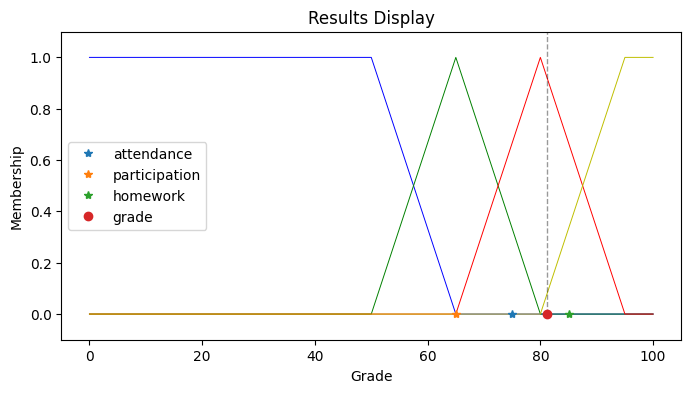

In [ ]:
# Візуалізація результату
plt.figure(figsize=(8, 4))
plt.plot(x_grade, grade_fail, 'b', linewidth=0.7)
plt.plot(x_grade, grade_pass, 'g', linewidth=0.7)
plt.plot(x_grade, grade_good, 'r', linewidth=0.7)
plt.plot(x_grade, grade_excellent, 'y', linewidth=0.7)

plt.plot([grade_centroid, grade_centroid], [0, grade_centroid], 'k', linewidth=1, alpha=0.4, linestyle='--')

plt.title('Results Display')
plt.ylabel('Membership')
plt.xlabel('Grade')
plt.ylim(-0.1, 1.1)

plt.plot(attendance_score, 0, '*', label='attendance')
plt.plot(participation_score, 0, '*', label='participation')
plt.plot(homework_score, 0, '*', label='homework')

plt.plot(grade_centroid, 0, 'o', label='grade')

plt.legend()
plt.show()